# 라이브러리 호출 및 폰트설정

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 경고
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        # !apt-get update -qq
        # !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

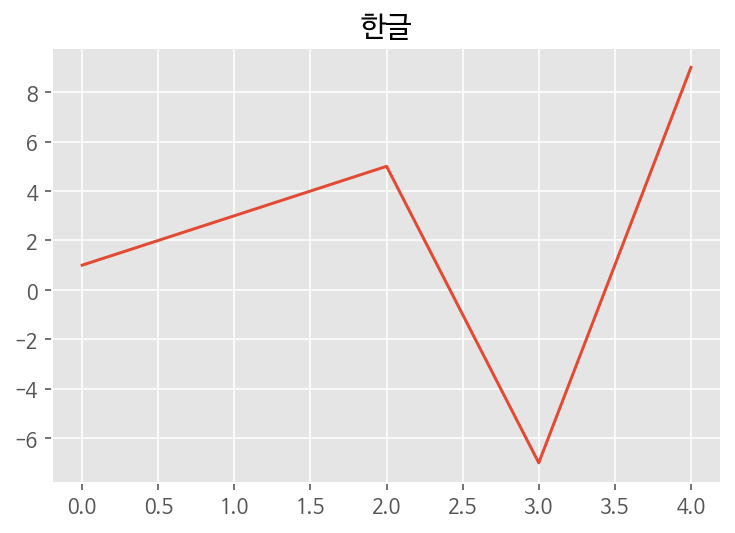

In [ ]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()

# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프 스타일 설정
plt.style.use('ggplot')

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 한글폰트 확인
pd.Series([1,3,5,-7,9]).plot(title="한글")

# 데이터 불러오기 및 탐색

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/물류 유통량 예측 경진대회/train.csv")
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/물류 유통량 예측 경진대회/test.csv')

submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/물류 유통량 예측 경진대회/sample_submission.csv")

In [ ]:
print("train:", train.shape)
print('test:', test.shape)

train: (31684, 5)
test: (7920, 4)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         7920 non-null   int64 
 1   송하인_격자공간고유번호  7920 non-null   int64 
 2   수하인_격자공간고유번호  7920 non-null   int64 
 3   물품_카테고리       7920 non-null   object
dtypes: int64(3), object(1)
memory usage: 247.6+ KB


In [ ]:
# 컬럼값 변경
train.columns = ['index','송하인','수하인','물품','운송장']

# Train

In [ ]:
train.head()

,index,송하인,수하인,물품,운송장
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [ ]:
train.corr()

,index,송하인,수하인,운송장
index,1.000000,-0.004233,-0.001006,0.011168
송하인,-0.004233,1.000000,-0.400686,-0.045961
수하인,-0.001006,-0.400686,1.000000,0.061049
운송장,0.011168,-0.045961,0.061049,1.000000


## 물품

In [ ]:
pd.set_option('display.max_row', 500,
              'display.max_columns', 100)

In [ ]:
catm_count = train.groupby('물품').count()['운송장'].sort_values(ascending=False)
catm_count_total = train.groupby('물품').sum()['운송장'].sort_values(ascending=False)

catm_count.rename('건 수', inplace=True)
catm_count_total.rename('총 합계', inplace=True)

cat_count = pd.concat([catm_count, catm_count_total], axis=1)
print(cat_count.shape)
cat_count

(100, 2)


,건 수,총 합계
물품,,
농산물,20321,87829.0
문화컨텐츠,1091,5429.0
음료,1034,5890.0
수산,860,4880.0
가공식품,846,5766.0
기타식품,698,4250.0
건강식품,591,3413.0
음반,576,2357.0
축산,383,3385.0


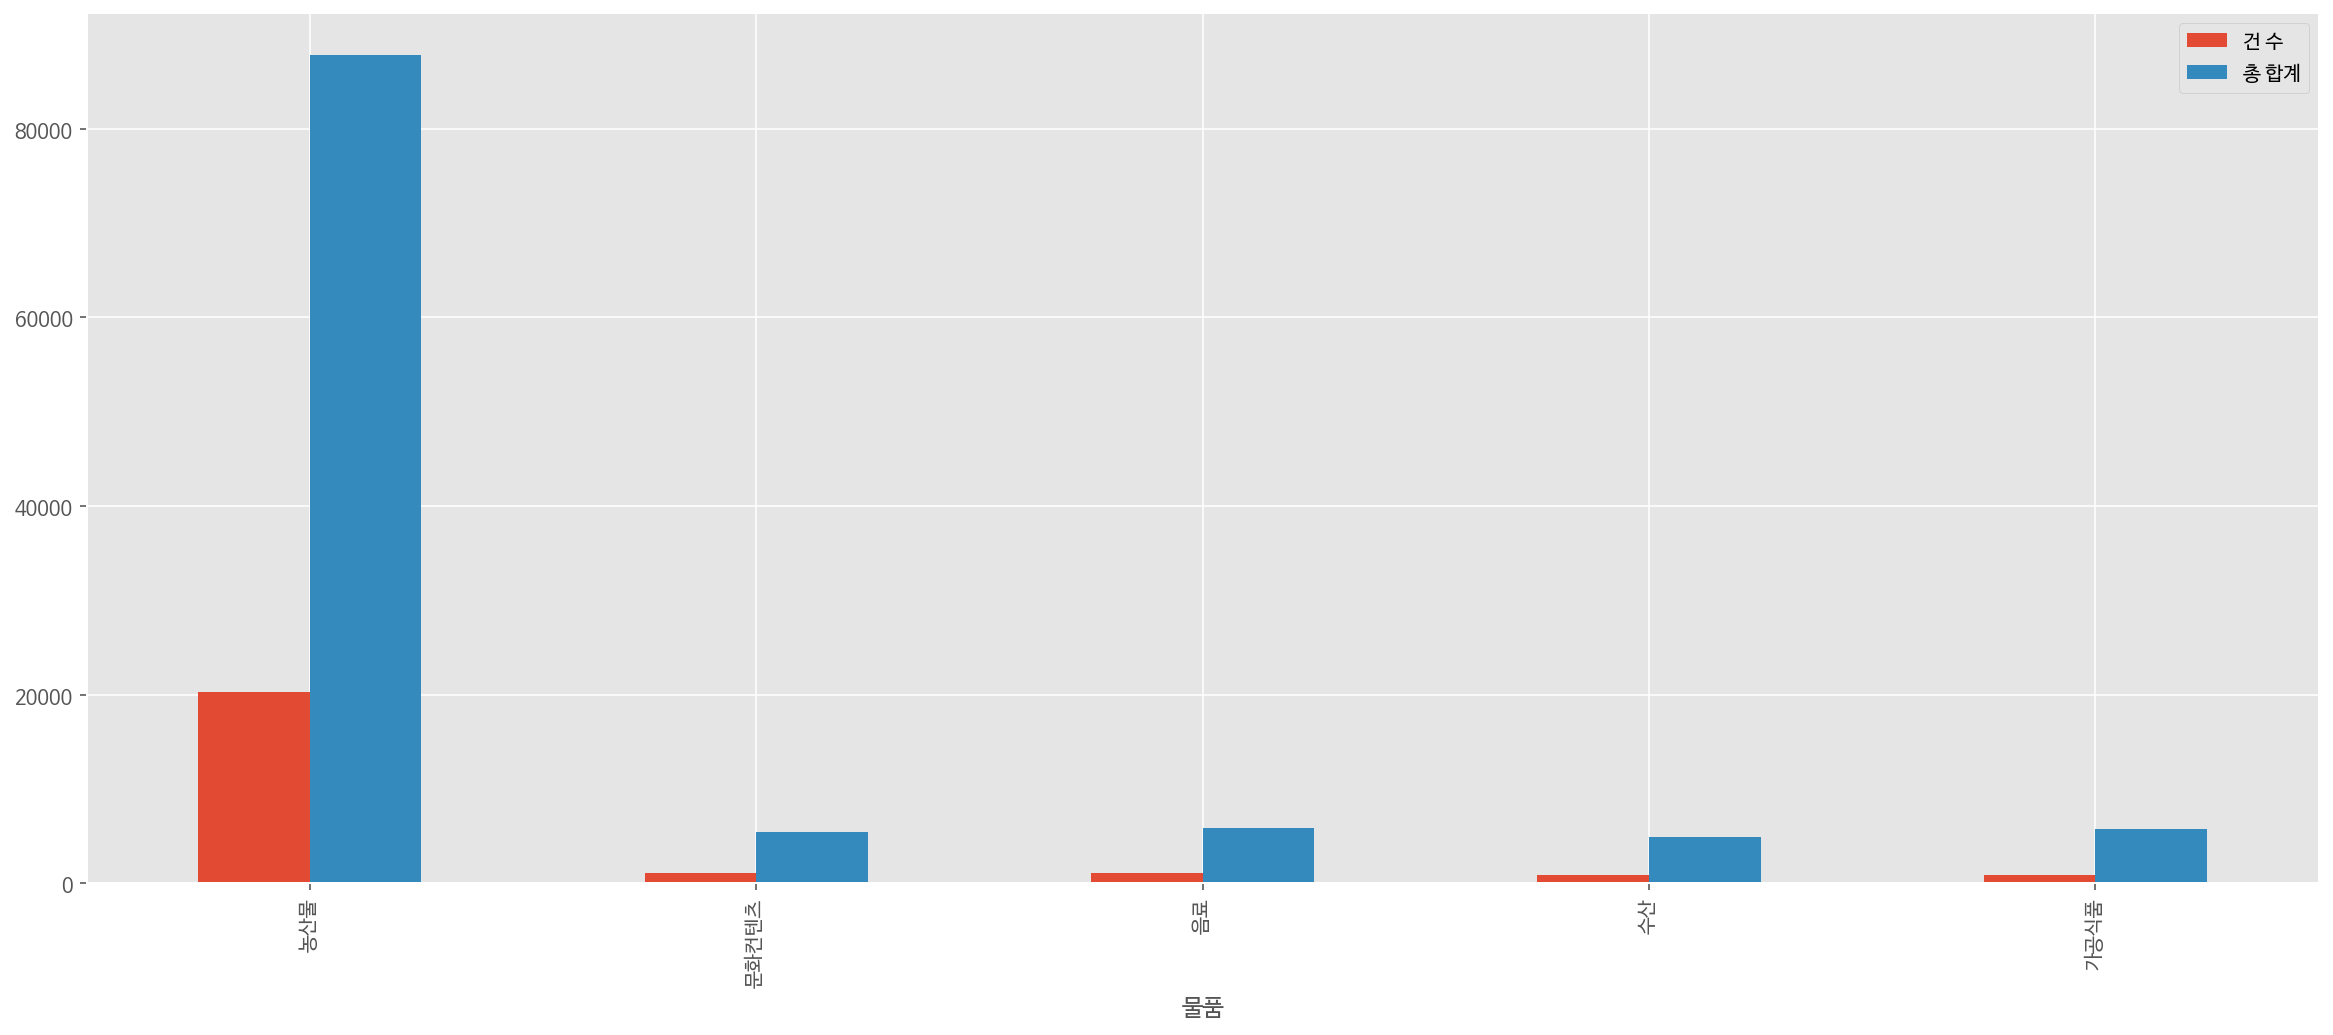

In [ ]:
cat_count.head(5).plot.bar(figsize=(20, 8))

#### 건 수_농산물 제외

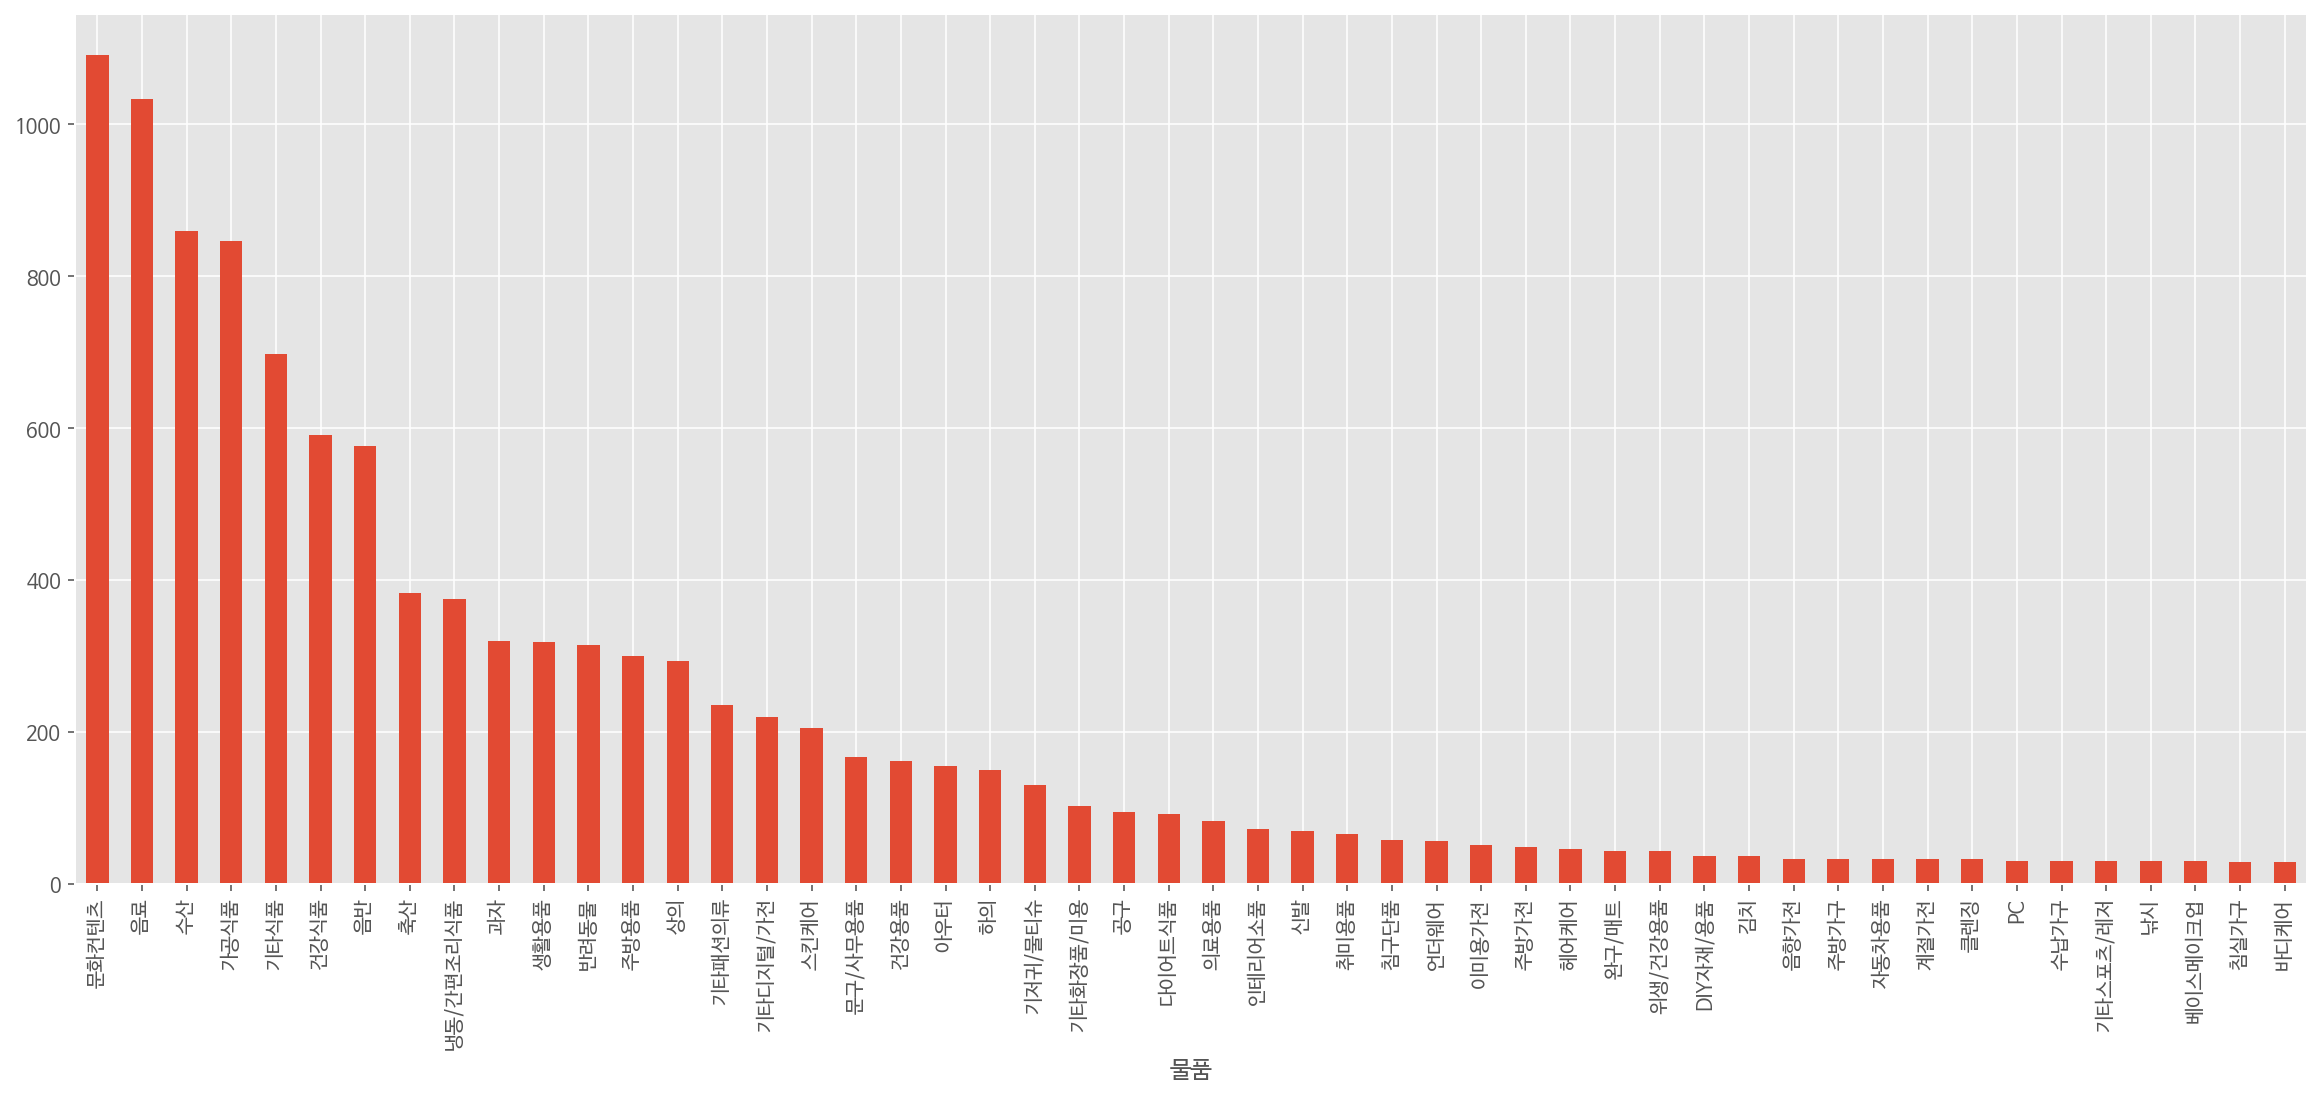

In [ ]:
head_catm_count = catm_count.drop(catm_count.index[0]).head(50).plot.bar(figsize=(20, 8))

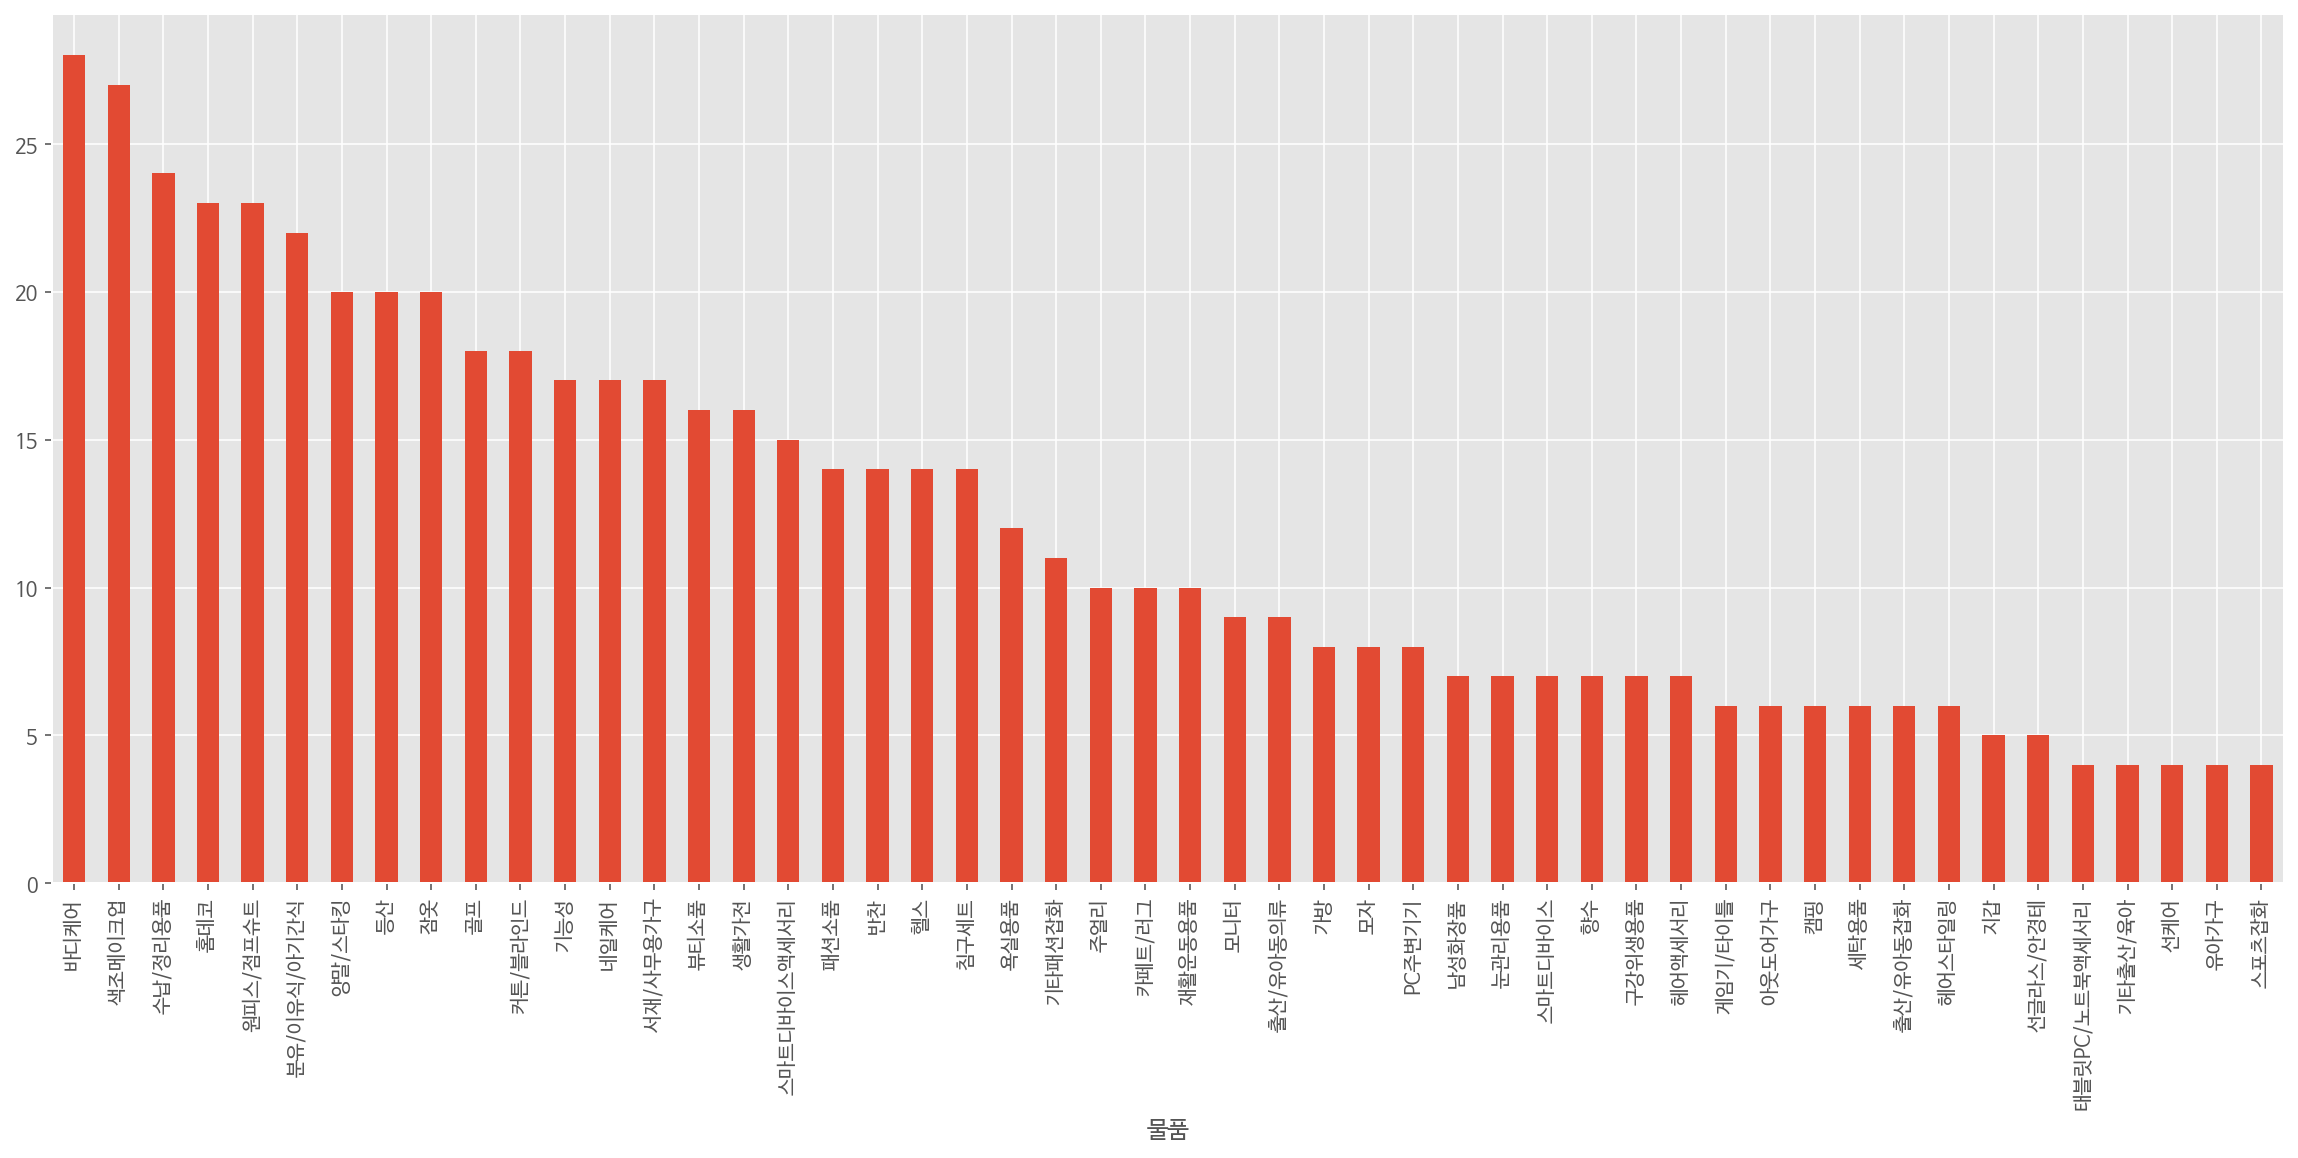

In [ ]:
tail_catm_count = catm_count.drop(catm_count.index[0]).tail(50).plot.bar(figsize=(20, 8))

In [ ]:
drop_crop = catm_count.drop(catm_count.index[0])
drop_crop

물품
문화컨텐츠            1091
음료               1034
수산                860
가공식품              846
기타식품              698
건강식품              591
음반                576
축산                383
냉동/간편조리식품         375
과자                320
생활용품              318
반려동물              315
주방용품              300
상의                294
기타패션의류            236
기타디지털/가전          220
스킨케어              205
문구/사무용품           167
건강용품              162
아우터               155
하의                150
기저귀/물티슈           130
기타화장품/미용          102
공구                 95
다이어트식품             92
의료용품               82
인테리어소품             72
신발                 70
취미용품               66
침구단품               58
언더웨어               56
이미용가전              51
주방가전               48
헤어케어               46
완구/매트              43
위생/건강용품            43
DIY자재/용품           36
김치                 36
음향가전               33
주방가구               33
자동차용품              32
계절가전               32
클렌징                32
PC                 30
수납가구               30
기타스포츠/레

#### 총 계_농산물 제외

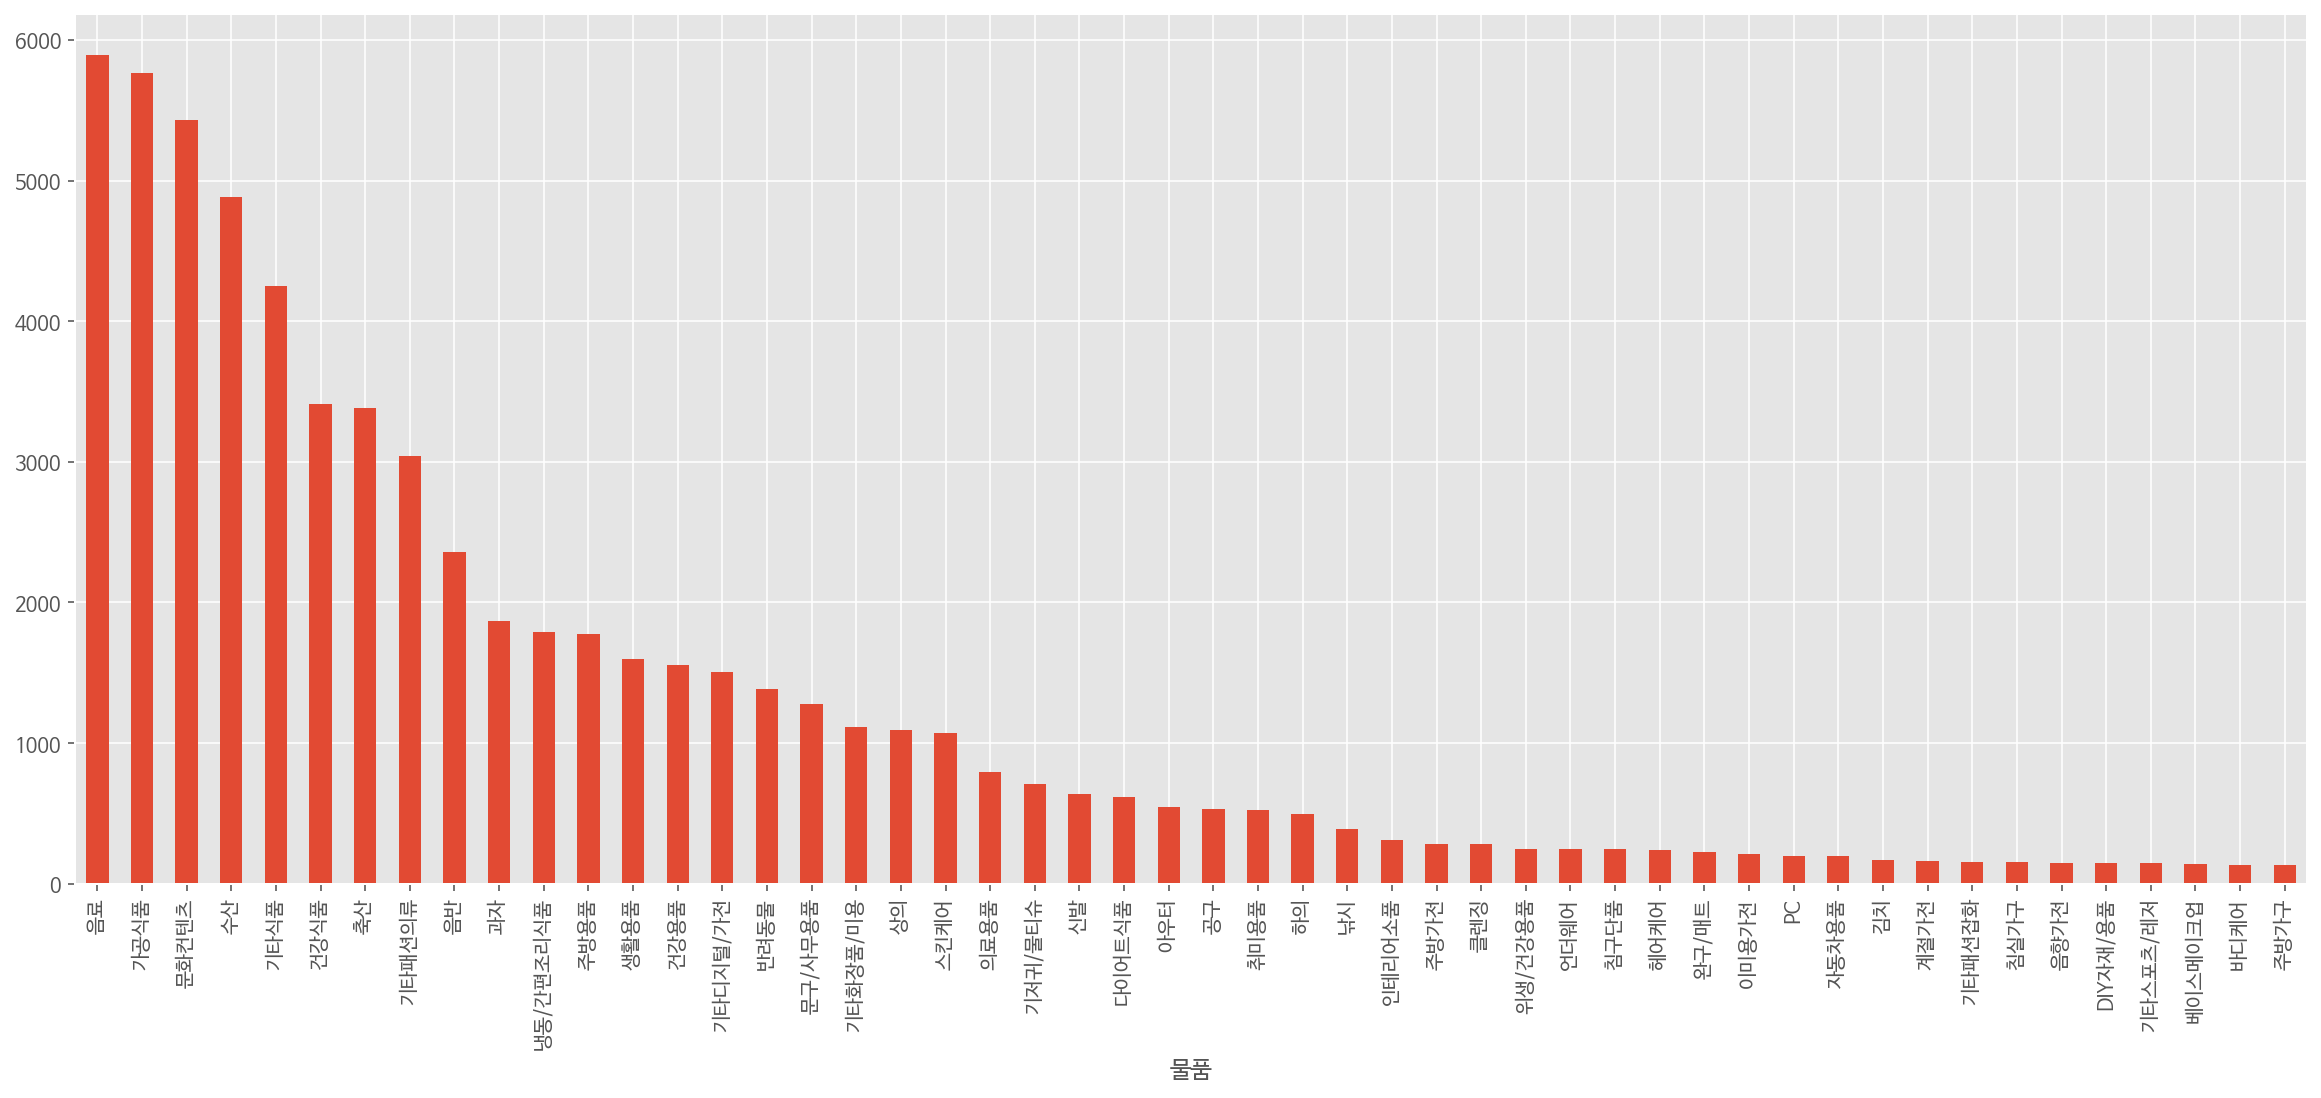

In [ ]:
head_catm_count_total = catm_count_total.drop(catm_count_total.index[0]).head(50).plot.bar(figsize=(20, 8))

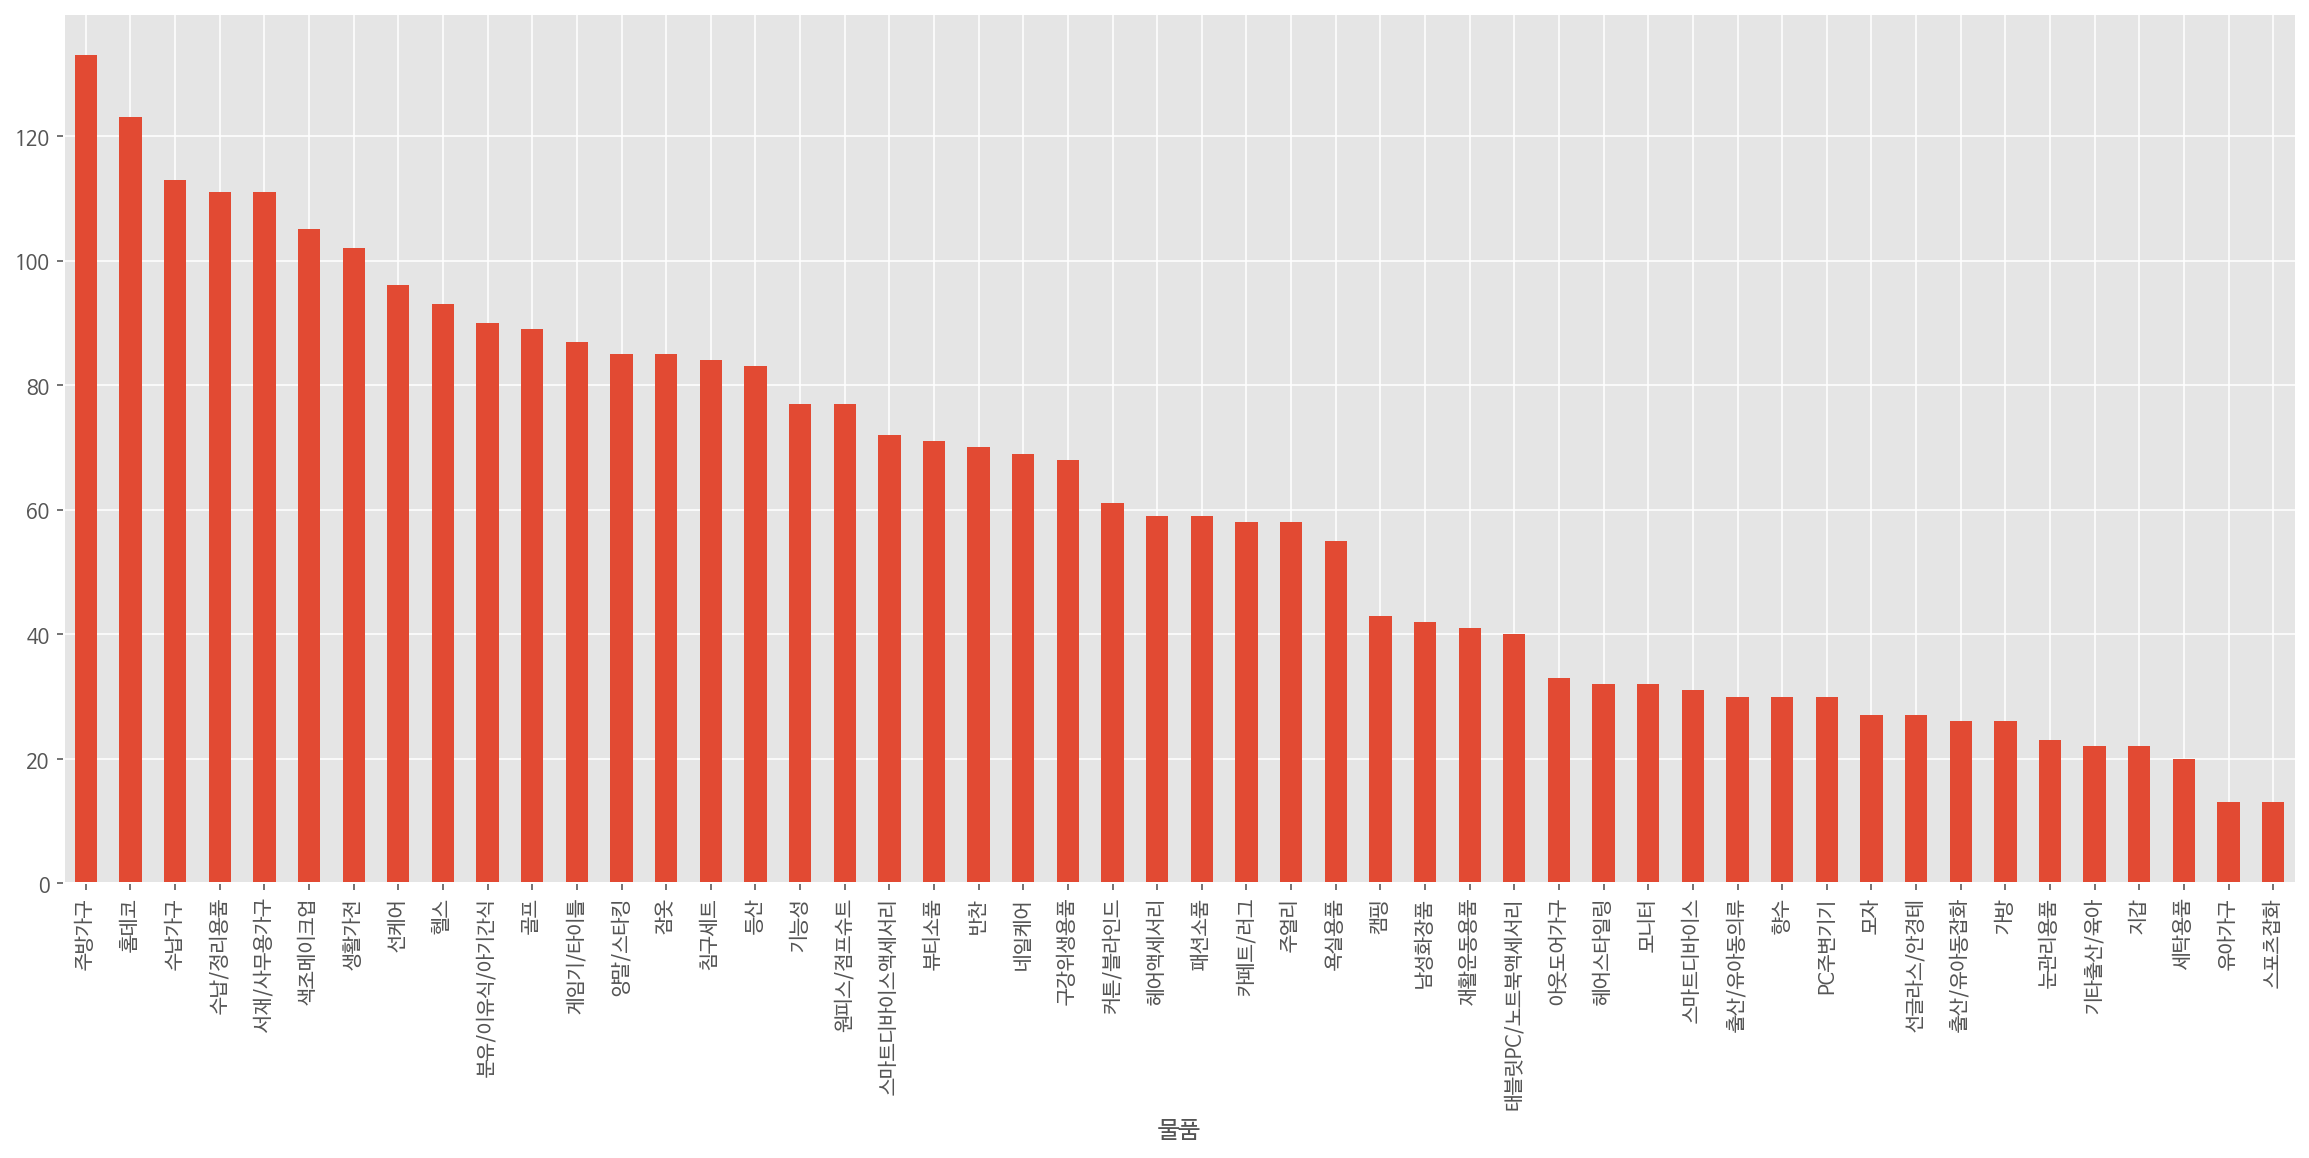

In [ ]:
tail_catm_count_total = catm_count_total.drop(catm_count_total.index[0]).tail(50).plot.bar(figsize=(20, 8))

In [ ]:
drop_crop_total = catm_count_total.drop(catm_count_total.index[0])
drop_crop_total

물품
음료               5890.0
가공식품             5766.0
문화컨텐츠            5429.0
수산               4880.0
기타식품             4250.0
건강식품             3413.0
축산               3385.0
기타패션의류           3042.0
음반               2357.0
과자               1866.0
냉동/간편조리식품        1787.0
주방용품             1776.0
생활용품             1599.0
건강용품             1554.0
기타디지털/가전         1505.0
반려동물             1388.0
문구/사무용품          1280.0
기타화장품/미용         1111.0
상의               1090.0
스킨케어             1070.0
의료용품              792.0
기저귀/물티슈           711.0
신발                637.0
다이어트식품            619.0
아우터               547.0
공구                532.0
취미용품              525.0
하의                496.0
낚시                386.0
인테리어소품            309.0
주방가전              285.0
클렌징               280.0
위생/건강용품           249.0
언더웨어              248.0
침구단품              246.0
헤어케어              240.0
완구/매트             225.0
이미용가전             212.0
PC                200.0
자동차용품             194.0
김치                166.0
계절가전         

In [ ]:
name = catm_count_total.index
fig = px.scatter(catm_count_total, x='총 합계', y='총 합계', color='총 합계', hover_name= name, size='총 합계', size_max=50)
fig.show()

In [ ]:
drop_crop_name = drop_crop_total.index
fig = px.scatter(drop_crop_total, x='총 합계', y='총 합계', color='총 합계', hover_name= drop_crop_name, size='총 합계', size_max=50)
fig.show()

## 운송장

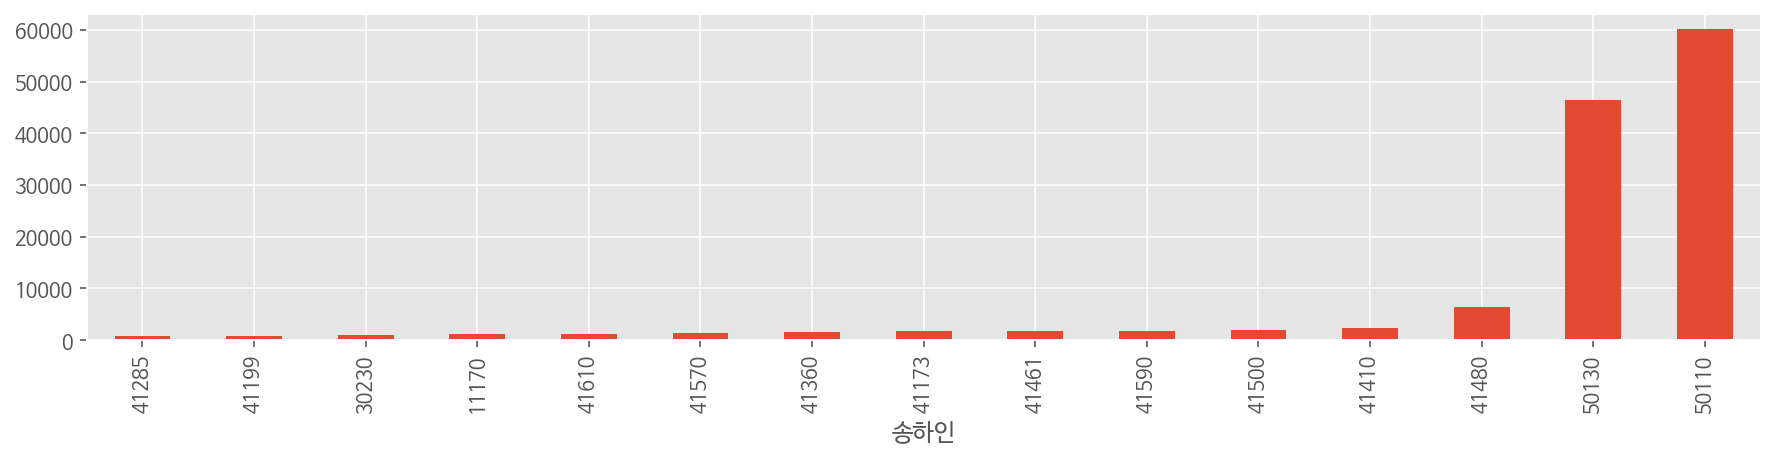

In [ ]:
# 송하인 운송장 합계
order_send_total = train.groupby('송하인').sum()['운송장'].sort_values()
order_send_total_plot = order_send_total.tail(15).plot(kind='bar', figsize=(15, 3))

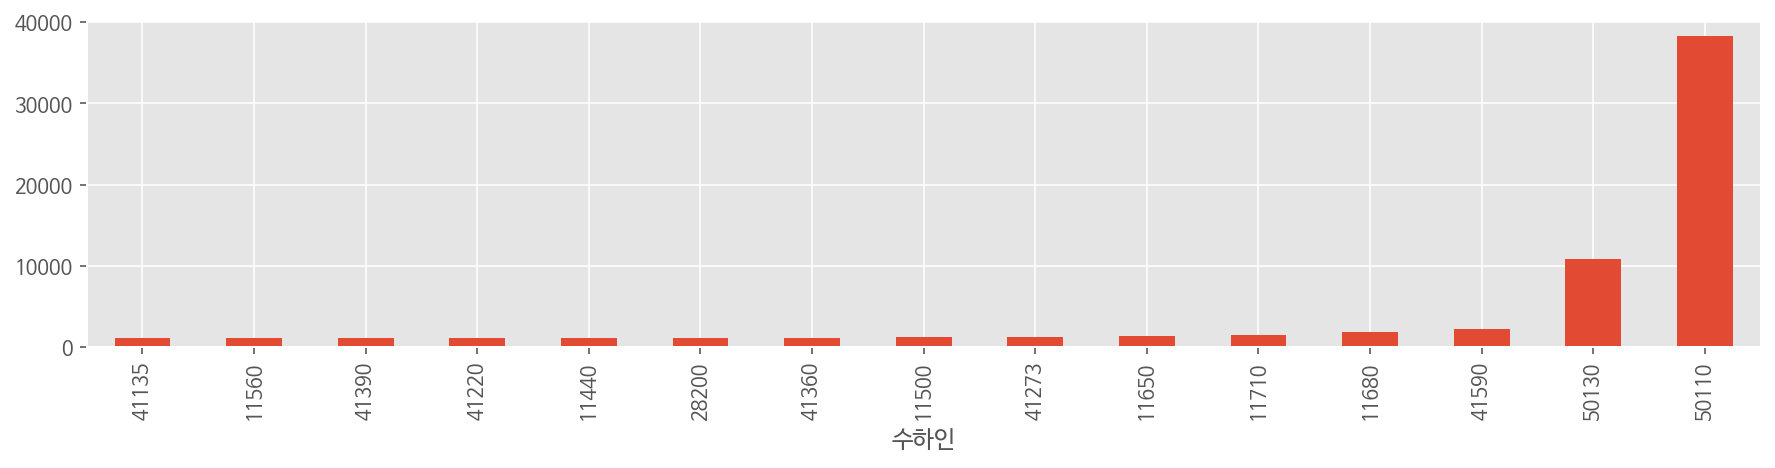

In [ ]:
# 수하인 운송장 합계
order_recv_total = train.groupby('수하인').sum()['운송장'].sort_values()
order_recv_total_plot = order_recv_total.tail(15).plot(kind='bar', figsize=(15,3))

In [ ]:
print("송하인:", order_send_total.sort_values(ascending=False))
print("-------------------------------------")
print("수하인:", order_recv_total.sort_values(ascending=False))

송하인: 송하인
5011000078068400    14391.0
5013000610049100     6439.0
5013000731055200     4579.0
5011000137030100     4054.0
4148000690015300     3064.0
                     ...   
1121500003097400        3.0
5011000315064300        3.0
1121500003026300        3.0
5011000502078400        3.0
3114000005041200        3.0
Name: 운송장, Length: 4229, dtype: float64
-------------------------------------
수하인: 수하인
5011000168096300    429
5011000314069300    400
5011000543041100    331
5011000373020100    267
5011000318041400    261
                   ... 
2811000076044200      3
2811000076010100      3
1156000025086100      3
2811000076005400      3
1135000032026400      3
Name: 운송장, Length: 26875, dtype: int64


## 주소(송하인, 수하인)

In [ ]:
# 격자공간고유번호에서 시군구코드만 추출
train['송하인'] = train['송하인'].apply(str)
train['수하인'] = train['수하인'].apply(str)

# slice the index numbers
train['송하인'] = train['송하인'].str.slice(0,5)
train['수하인'] = train['수하인'].str.slice(0,5)

In [ ]:
print(train['송하인'])
print(train['수하인'])

0        50110
1        41480
2        50110
3        41271
4        50110
         ...  
31679    44710
31680    11290
31681    11290
31682    41273
31683    28110
Name: 송하인, Length: 31684, dtype: object
0        28710
1        50110
2        11200
3        50110
4        28237
         ...  
31679    50110
31680    50110
31681    50110
31682    50110
31683    50110
Name: 수하인, Length: 31684, dtype: object


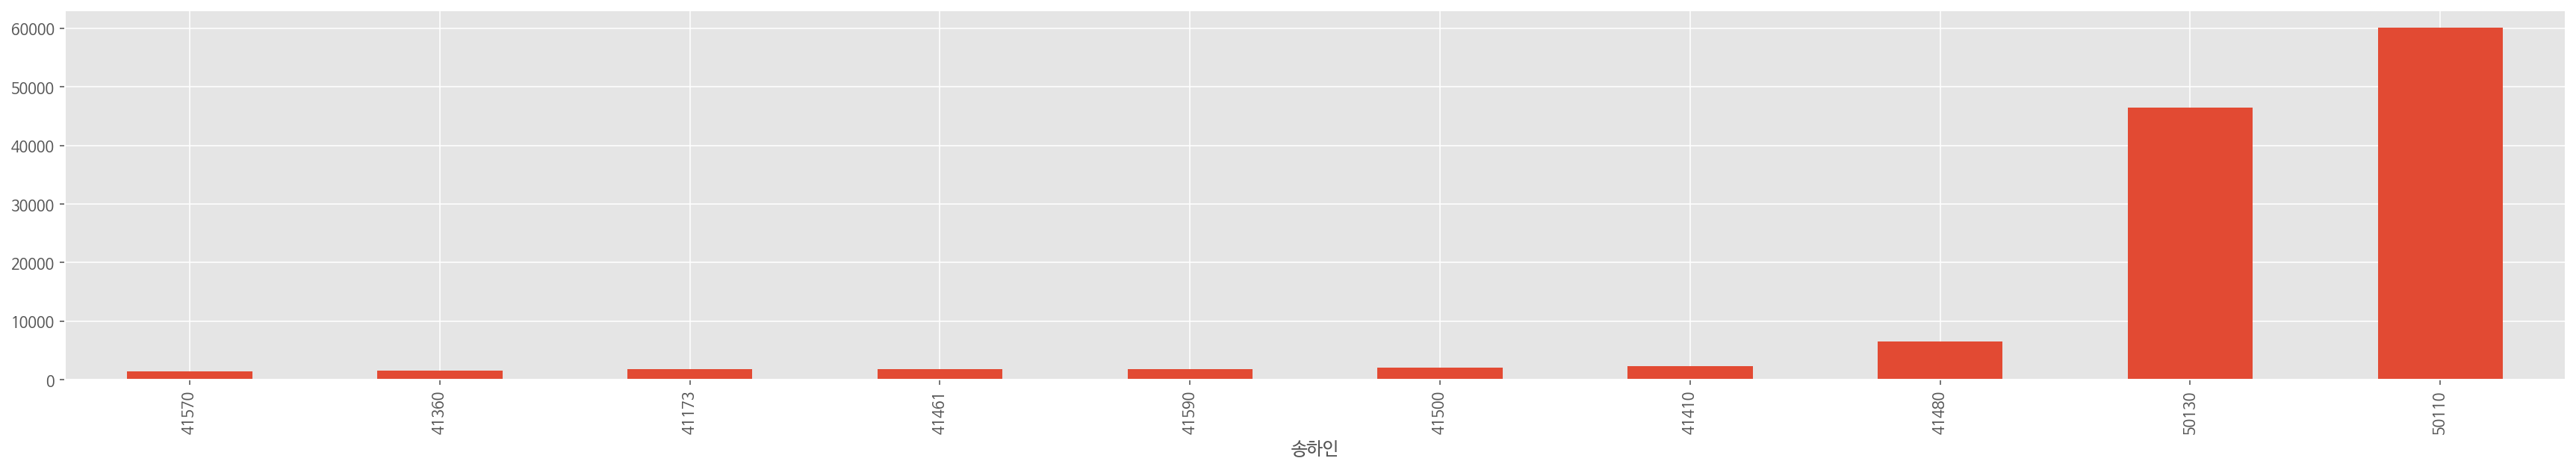

In [ ]:
# 송하인 운송장 합계
plt.subplot(2, 1, 2)
order_send_total_5 = train.groupby('송하인').sum()['운송장'].sort_values()
order_send_total_5_plot = order_send_total_5.tail(10).plot(kind='bar', figsize=(30, 10))

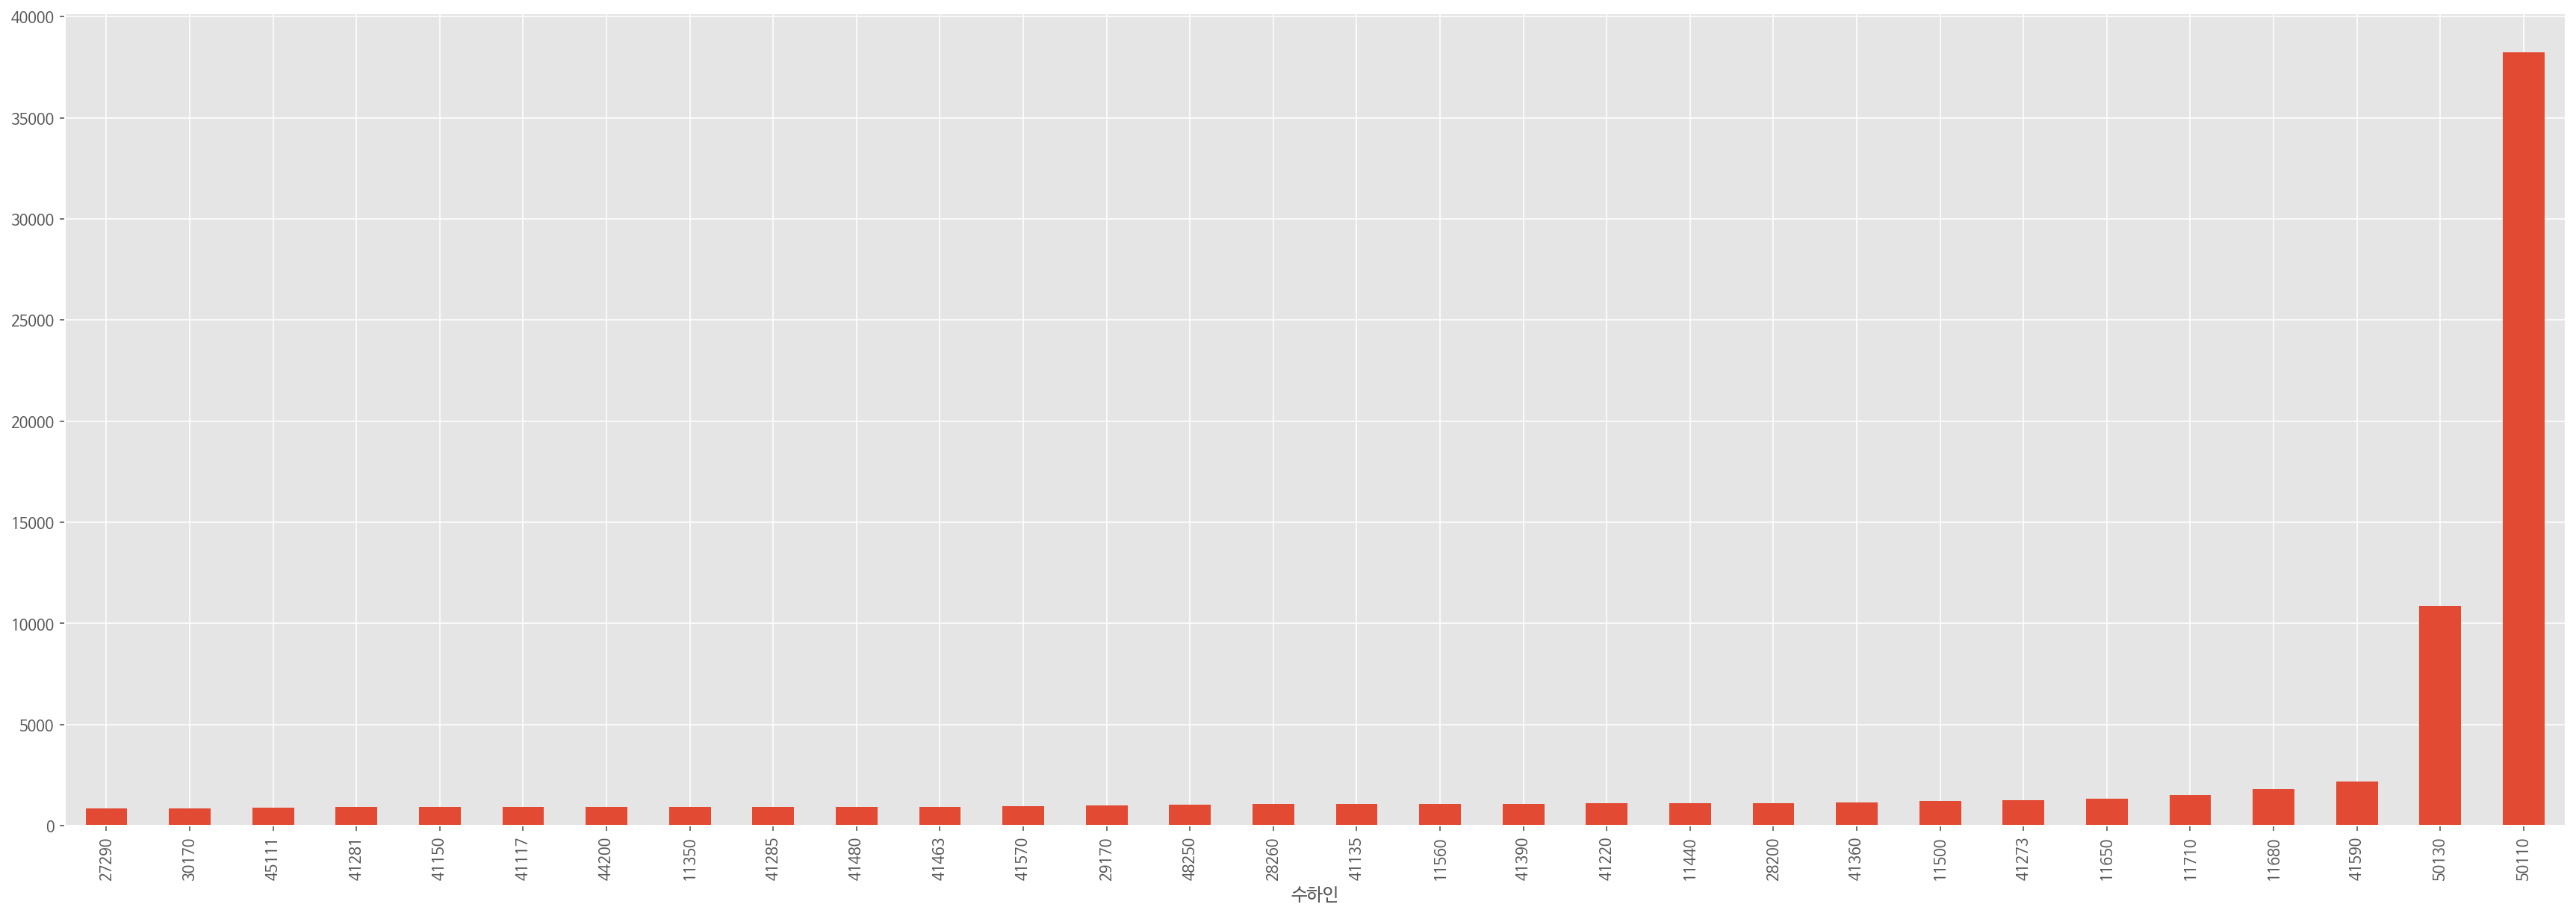

In [ ]:
# 수하인 운송장 합계
order_recv_total_5 = train.groupby('수하인').sum()['운송장'].sort_values()
order_recv_total_5_plot = order_recv_total_5.tail(30).plot(kind='bar', figsize=(30, 10))

In [ ]:
order_send_total_5.sort_values(ascending=False).head(30)

송하인
50110    60067
50130    46515
41480     6470
41410     2256
41500     1992
41590     1826
41461     1748
41173     1745
41360     1514
41570     1419
41610     1191
11170     1174
30230      903
41199      830
41285      702
28260      635
11650      620
41220      548
11290      529
44133      500
41273      488
41650      486
11530      463
41370      446
41550      411
43770      410
11680      398
27230      384
11545      382
43710      367
Name: 운송장, dtype: int64

In [ ]:
order_recv_total_5.sort_values(ascending=False).head(30)

수하인
50110    38246
50130    10858
41590     2188
11680     1815
11710     1530
11650     1320
41273     1268
11500     1217
41360     1162
28200     1123
11440     1113
41220     1106
41390     1093
11560     1089
41135     1085
28260     1078
48250     1027
29170      992
41570      979
41463      940
41480      938
41285      937
11350      933
44200      924
41117      920
41150      918
41281      917
45111      897
30170      869
27290      850
Name: 운송장, dtype: int64

In [ ]:
train.head()

,index,송하인,수하인,물품,운송장
0,0,50110,28710,음반,3
1,1,41480,50110,문화컨텐츠,3
2,2,50110,11200,농산물,3
3,3,41271,50110,기타식품,7
4,4,50110,28237,농산물,3


In [ ]:
train[train['물품'] == '농산물']['송하인'].value_counts().head(15)

50130    10081
50110     9891
41570       21
41360       16
47750       11
27230       11
47170       11
41650       10
29140        8
43740        7
46820        7
41590        6
45140        5
27710        5
11500        5
Name: 송하인, dtype: int64

In [ ]:
train[train['물품'] == '문화컨텐츠']['송하인'].value_counts().head(15)

41480    855
50110     40
11650     31
41800     22
11290     14
30200     12
11110      6
27140      5
41285      5
50130      5
11200      5
43113      4
11170      4
11140      4
41117      3
Name: 송하인, dtype: int64

In [ ]:
train[train['송하인'] == '50110']['물품'].value_counts().head(20)

농산물          9891
수산            735
음료            543
음반            451
기타식품          332
축산            272
가공식품          217
냉동/간편조리식품      94
과자             86
기타패션의류         81
건강식품           76
문화컨텐츠          40
기타디지털/가전       18
주방가전           15
아우터            15
상의             10
네일케어           10
기타화장품/미용       10
주방용품            8
스킨케어            8
Name: 물품, dtype: int64

In [ ]:
train[train['송하인'] == '50130']['물품'].value_counts().head(20)

농산물          10081
기타식품            82
과자              72
음료              71
가공식품            19
기타패션의류          15
수산              13
건강식품            13
축산              10
취미용품             9
커튼/블라인드          8
문화컨텐츠            5
양말/스타킹           4
잠옷               3
냉동/간편조리식품        3
하의               3
상의               3
홈데코              2
신발               2
생활용품             2
Name: 물품, dtype: int64

In [ ]:
train[train['송하인'] == '41480']['물품'].value_counts().head(20)

문화컨텐츠       855
음반          122
가공식품         41
반려동물         22
음향가전         20
건강식품         13
생활용품         10
완구/매트         9
출산/유아동의류      7
문구/사무용품       6
아우터           6
인테리어소품        6
취미용품          6
주방용품          5
농산물           5
수납가구          5
기타디지털/가전      4
자동차용품         4
과자            4
서재/사무용가구      3
Name: 물품, dtype: int64

In [ ]:
train[train['송하인'] == '41410']['물품'].value_counts().head(20)

스킨케어         67
가공식품         61
건강용품         48
상의           44
건강식품         43
아우터          37
주방용품         24
기저귀/물티슈      21
베이스메이크업      16
생활용품         13
헤어케어         11
다이어트식품        8
패션소품          7
음료            6
언더웨어          5
색조메이크업        5
반려동물          4
DIY자재/용품      4
하의            4
냉동/간편조리식품     4
Name: 물품, dtype: int64

In [ ]:
train[train['송하인'] == '41500']['물품'].value_counts().head(20)

건강식품           137
음료              60
다이어트식품          48
냉동/간편조리식품       15
반려동물            10
생활용품             6
가공식품             5
상의               5
아우터              5
취미용품             5
주방용품             4
과자               4
신발               3
클렌징              3
분유/이유식/아기간식      3
기저귀/물티슈          3
기타식품             3
공구               2
문화컨텐츠            2
하의               2
Name: 물품, dtype: int64

In [ ]:
train[train['수하인'] == '50110']['물품'].value_counts().head(20)

문화컨텐츠        806
가공식품         491
건강식품         397
음료           319
농산물          287
반려동물         245
생활용품         238
상의           225
냉동/간편조리식품    218
주방용품         203
기타식품         203
기타디지털/가전     170
스킨케어         155
건강용품         137
문구/사무용품      125
과자           120
기타패션의류       117
아우터          103
하의           103
기저귀/물티슈      102
Name: 물품, dtype: int64

In [ ]:
train[train['수하인'] == '50130']['물품'].value_counts().head(20)

문화컨텐츠        244
가공식품         165
농산물          127
건강식품         115
음료           101
주방용품          89
기타식품          85
생활용품          73
냉동/간편조리식품     71
반려동물          65
상의            56
음반            49
과자            47
스킨케어          42
하의            40
축산            38
아우터           36
문구/사무용품       34
기타디지털/가전      33
수산            31
Name: 물품, dtype: int64

In [ ]:
train[train['수하인'] == '41590']['물품'].value_counts().head(20)

농산물         406
수산           16
음료           15
음반            6
축산            4
가공식품          3
기타식품          3
건강식품          2
기타패션의류        1
생활용품          1
문화컨텐츠         1
주방용품          1
기능성           1
기타디지털/가전      1
Name: 물품, dtype: int64

In [ ]:
train[train['수하인'] == '11680']['물품'].value_counts().head(20)

농산물          299
음반            18
수산            15
축산            10
음료             7
가공식품           5
기타식품           5
과자             4
건강식품           2
기타패션의류         1
이미용가전          1
문구/사무용품        1
냉동/간편조리식품      1
문화컨텐츠          1
스킨케어           1
주방가전           1
Name: 물품, dtype: int64

In [ ]:
train[train['수하인'] == '11710']['물품'].value_counts().head(20)

농산물            292
수산              11
기타식품            10
축산               7
음반               6
음료               5
과자               2
냉동/간편조리식품        2
문화컨텐츠            1
기타패션의류           1
분유/이유식/아기간식      1
건강식품             1
생활용품             1
Name: 물품, dtype: int64